# CMA Diagram

Clemmow-Mullaly-Allis (CMA) Diagram

**Warning**: This notebook would store data (png images) under your jupyter working directory. To be accurate, that is `/the-path-to-your-jupyter-working-directroy/sinupy_data/dispersion/*.png`. Of course you can modify it (`data_path`) in the following block.


In [27]:
from sympy import sqrt, pi, init_printing; init_printing()
from scipy.constants import e, m_p, m_e, c
import sinupy.mediums.plasma as pms


import matplotlib.pyplot as plt
from pathlib import Path
data_path = Path('./sinupy_data/dispersion'); data_path.mkdir(parents=True, exist_ok=True)
from sinupy.draw import draw_discontinuable_expr, add_line_with_slope

import sinupy.algebra.utility as fualguti

In [28]:
from sinupy import mediums, waves
from sinupy.waves import EM
plasma = mediums.ColdMagnetizedPlasma(species='e+i')
wave_eq = waves.EM.WaveEq(plasma)
wave = wave_eq.wave

In [29]:
m_i_N = m_p
m_e_N = m_e
omega_ce = pms.omega_ce(plasma=plasma)
omega_pe = pms.omega_pe(plasma=plasma)
# Even if your plasma.species is 'e', the ion-relevant symbols would not interrupt ...
# our calculation procedure, because `expr.subs(a_specific_symbol, a_numeric_value)` ...
# also would not interrupt our procedure (i.e. throw an exception) when it finds there ...
# does not exist such `a_specific_symbol` in the formula.
omega_ci = pms.omega_cj(plasma=plasma, varidx='i')
omega_pi = pms.omega_pj(plasma=plasma, varidx='i')

# Substitute symbol parameters with accurate numerical values.
# Note the function will capture the variables B, n_0, m_i from the working scope.

w2N = lambda expr: expr\
    .subs(omega_ce, pms.omega_ce(B=B))\
    .subs(omega_pe, pms.omega_pe(n_0=n_0))\
    .subs(omega_ci, pms.omega_cj(q_e=1, m=m_i_N, B=B))\
    .subs(omega_pi, pms.omega_pj(n_0=n_0, q_e=1, m=m_i_N))

### $N^2(\omega, \theta=0)$ and $\omega$ Singularies 
Express $N^2$ with $\omega$, $\omega_{ce}$, $\omega_{pe}$, rather than $\kappa_\perp$, $\kappa_\times$, $\kappa_\parallel$.

There exist omega $\omega$ singularites. At these points, $\omega$ would cause an infinite $N^2$, *i.e.* induce resonance. 

The number of numerical result may be less than analytic symbol results, because sympy knows $\omega \geq 0$ and removes some obviously wrong answers.

In [30]:
# Substitute kappa components with omega.
N2_in_omega = [
    pms.kappa2omega(sol, wave, plasma) for sol in 
    EM.solve_N2(wave_eq, theta=0)] # <-- Set theta here

# Symbol results of omega singularities
[fualguti.find_singularities(sol, wave.w) for sol in N2_in_omega]

# Substitute constant parameters with accurate numerical values.
B, n_0 = 5, 1e20
N2_in_omega = [w2N(sol) for sol in N2_in_omega]

# Numerical result of omega singularities
omega_singularites = \
    [fualguti.find_singularities(sol, wave.w) for sol in N2_in_omega]


In [31]:
plasma_B_n_0_omega = [
    (1.5e0, 2e19, 8e11), (50, 2e19, 8e11), (5e2, 2e19, 8e11), (1.2e4, 2e19, 8e11),
    (1.5e0, 1e22, 8e11), (50, 1e22, 8e11), (5e2, 1e22, 8e11), (1.2e4, 1e22, 8e11),
                                           (5e2, 5e24, 8e11), (1.2e4, 5e24, 8e11)]


theta = EM.theta_btwn_B_and_k(wave_eq)
N2_in_omega_theta = [
    pms.kappa2omega(sol, wave, plasma) for sol in # Substitute kappa components with omega.
    EM.solve_N2(wave_eq)]
for i, (B, n_0, omega) in enumerate(plasma_B_n_0_omega):
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
    x_CMA = w2N((omega_pe**2 + omega_pi**2) / omega**2)
    y_CMA = w2N(omega_ce * omega_ci / omega**2)
    xy_CMA = (x_CMA, y_CMA)
    print(xy_CMA)
    ax.set_xlabel('$\\theta$ [deg]') 
    ax.set_ylabel('$v_{ph}/c$', loc='top') 
    ax.grid(True)
    ax.set_theta_zero_location('N')
    
    # Substitute constant parameters with accurate numerical values.
    N2_in_theta = [w2N(sol.subs(wave.w, omega)) for sol in N2_in_omega_theta]

    ax = ax
    v_ph_ratio_c_with_theta = [1 / sqrt(sol) for sol in N2_in_theta]
    draw_discontinuable_expr(
        v_ph_ratio_c_with_theta, theta, 
        varlim=(-float(pi), float(pi)), # limit of theta, from [0, pi]
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax)
    
    fig.savefig(data_path / f'v_ph_{i}.png', bbox_inches='tight')
    plt.close(fig)

(0.0995106455042796, 5.92292933244898e-5)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(0.0995106455042796, 0.0658103259160998)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(0.0995106455042796, 6.58103259160998)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(0.0995106455042796, 3790.67477276735)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(49.7553227521398, 5.92292933244898e-5)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(49.7553227521398, 0.0658103259160998)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(49.7553227521398, 6.58103259160998)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(49.7553227521398, 3790.67477276735)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(24877.6613760699, 6.58103259160998)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

(24877.6613760699, 3790.67477276735)


Text(0.5, 0, '$\\theta$ [deg]')

Text(0, 1, '$v_{ph}/c$')

<string>:2: RuntimeWarning: invalid value encountered in sqrt


(<Figure size 864x864 with 1 Axes>,
 <PolarAxesSubplot:xlabel='$\\theta$ [deg]', ylabel='$v_{ph}/c$'>)

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

In [33]:
from sympy import symbols, solve, Eq, sqrt, pi
from sinupy.algebra.draw import draw_discontinuable_expr, add_line_with_slope
e, epsilon = symbols('e, epsilon', positive=True)
m_e, m_i = plasma.m['e'], plasma.m['i']
n_e, n_i = plasma.n['e'], plasma.n['i']
B = plasma.B_amp()

w2Bn = lambda expr: expr\
    .subs(omega_ce, e * B / m_e)\
    .subs(omega_ci, e * B / m_i)\
    .subs(omega_pe**2, e**2 * n_e /(epsilon * m_e))\
    .subs(omega_pi**2, e**2 * n_e /(epsilon * m_i))

## Wave Resonance
Wave resonance happens when the relative refracion, $N$ blow up to infinity. As we already know, $N^2$ is a function of the wave angular frequency $\omega$, the angle $\angle(\vec{k}, \vec{B})$ between the wave $\vec{k}$ vector, the external magnetic field $\vec{B}$, and other characteristic frequency in plasma, *i.e.* $\omega_{pe}$ ,$\omega_{ce}$ and so on. In the following blocks, we fix the angle and find the $\omega^2$ that would make $N$ blow up.

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

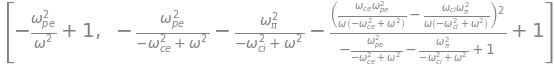

In [34]:
N2_in_omega = [
    pms.kappa2omega(sol, wave, plasma) for sol in 
    EM.solve_N2(wave_eq, theta=pi/2)] # <-- Set theta here
N2_in_omega

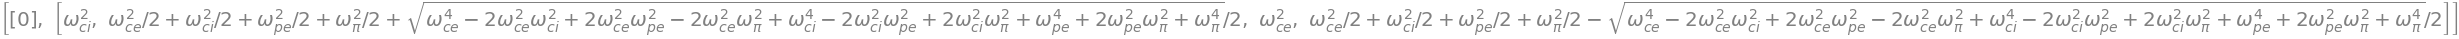

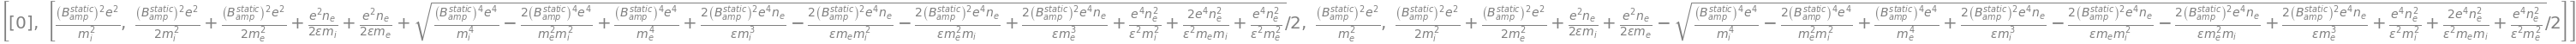

In [35]:
resonance_omega_points = [fualguti.find_singularities(sol, wave.w) for sol in N2_in_omega]
resonance_omega_square_points = [
        list(set(map(lambda x:pow(x,2), branch_omega_points))) 
    for branch_omega_points in resonance_omega_points]
resonance_omega_square_points
# The above expressions contain $omega_{pe}$, $\omega_{ce}$ and so on.
# We transform them to basic plasma parameters like $\vec{B}$, $n_e$ as follows.
resonance_omega_square_points = [[
    w2Bn(omega_square) for omega_square in branch
] for branch in resonance_omega_square_points] 
resonance_omega_square_points

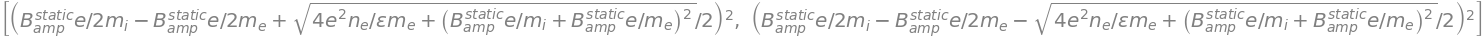

In [36]:
cutoff_omega_square_points = [
    w2Bn(omega_square) for omega_square in 
    [((omega_ci-omega_ce + sqrt((omega_ce+omega_ci)**2 + 4 * omega_pe**2))/2)**2, 
     ((omega_ci-omega_ce - sqrt((omega_ce+omega_ci)**2 + 4 * omega_pe**2))/2)**2]
#     [((pms.omega_ce + sqrt(pms.omega_ce**2 + 4 * pms.omega_pe**2))/2)**2, 
#      ((-pms.omega_ce + sqrt(pms.omega_ce**2 + 4 * pms.omega_pe**2))/2)**2, ]
] 

cutoff_omega_square_points

In [37]:
X, Y = symbols('X, Y', real=True, negative=False)
Bn2XY = lambda expr: expr\
    .subs(B**2, Y * (m_e * m_i * wave.w**2) /(e**2))\
    .subs(B, sqrt(Y * (m_e * m_i)) * wave.w / e)\
    .subs(n_e, X * (epsilon * m_e * wave.w**2) / e**2)


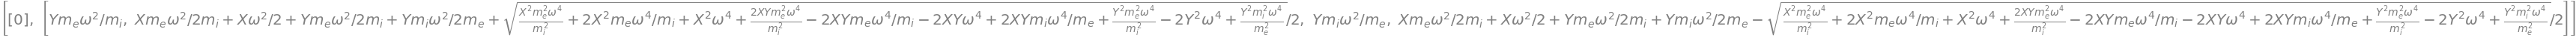

In [38]:
resonance_omega_square_points = [[
    Bn2XY(omega_square) for omega_square in branch
] for branch in resonance_omega_square_points] 
resonance_omega_square_points

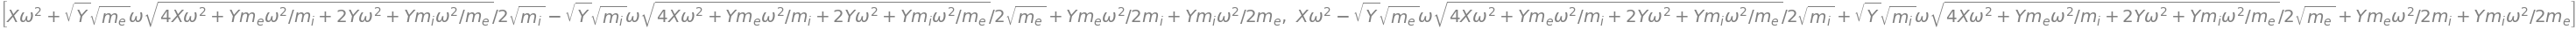

In [39]:
cutoff_omega_square_points = [
    Bn2XY(omega_square.expand()) for omega_square in cutoff_omega_square_points
]
cutoff_omega_square_points

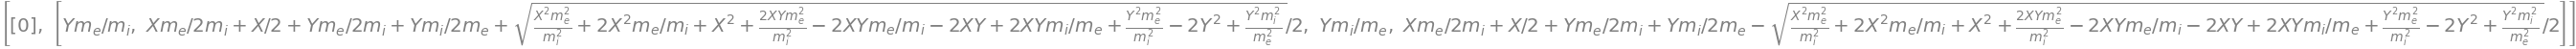

In [40]:
resonance_points_as_Eq_1 = [
        [omega_square.subs(wave.w, 1) for omega_square in branch] 
    for branch in resonance_omega_square_points]
resonance_points_as_Eq_1

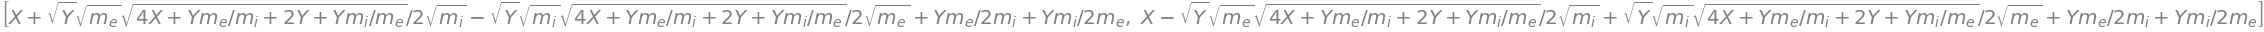

In [41]:
cutoff_points_as_Eq_1 = [
        omega_square.subs(wave.w, 1) 
    for omega_square in cutoff_omega_square_points]
cutoff_points_as_Eq_1

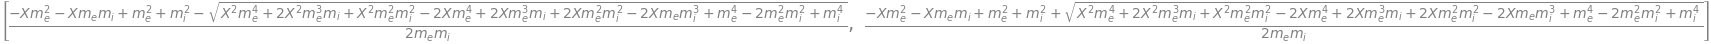

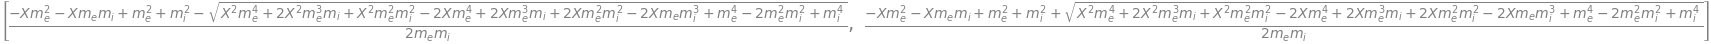

In [42]:
from sympy import solve, Eq
solve(Eq(resonance_points_as_Eq_1[1][0], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][1], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][2], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][3], 1), Y)


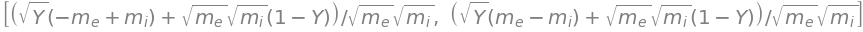

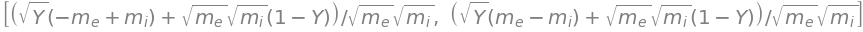

In [43]:
solve(Eq(cutoff_points_as_Eq_1[0], 1), X)
solve(Eq(cutoff_points_as_Eq_1[1], 1), X)

In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last" # display all expression in one cell instead of the last one

In [45]:
import matplotlib.pyplot as plt
fig_CMA, ax_CMA = plt.subplots(figsize=(20, 30))
ax_CMA.set_xscale('log')
ax_CMA.set_yscale('log')
ax_CMA.set_xlabel('$\omega_p^2/\omega^2$', loc='right', fontdict={'size': 32}) 
ax_CMA.set_ylabel('$\\frac{\omega_{ce}\omega_{ci}}{\omega^2}$ ', loc='top', fontdict={'size': 32}, rotation=0) 
# ax_CMA.set_xticks([1.0])
# ax_CMA.set_xticklabels(size=20)
ax_CMA.set_yticks([1./m_i_N, 1.0, m_i_N/1])
ax_CMA.set_yticklabels(['$m_e/m_i$', '$1.0$', '$m_i/m_e$'], size=20)
# change the fontsize 
ax_CMA.tick_params(axis='x', labelsize=20) 

ax_CMA.axhline(
    y=solve(Eq(resonance_points_as_Eq_1[1][0], 1), Y)[0].subs(m_i, m_i_N).subs(m_e, m_e_N), 
    color='blue', linestyle=':', label='$u_L=0$, $\omega=\omega_{ce}$')
ax_CMA.axhline(
    y=solve(Eq(resonance_points_as_Eq_1[1][2], 1), Y)[0].subs(m_i, m_i_N).subs(m_e, m_e_N), 
    color='purple', linestyle=':', label='$u_R=0$, $\omega=\omega_{ci}$')
ax_CMA.axvline(
    x=1,
    color='darkcyan', linestyle=':', label='$u_O=\infty$, $\omega=\omega_{pe}$')
draw_discontinuable_expr(
    [sol.subs(m_i, m_i_N).subs(m_e, m_e_N)
     for sol in solve(Eq(resonance_points_as_Eq_1[1][1], 1), Y)], X, # [1][3] is also okay
    varlim = (1e-3, 1e7), exprlim=(1e-5, None), num=500,
    var_sample_scale='log', fig=fig_CMA, ax=ax_CMA, labels=['$u_X=0$, $\omega=\omega_{UH}$', '$u_X=0$, $\omega=\omega_{LH}$']
)
draw_discontinuable_expr(
    [sol.subs(m_i, m_i_N).subs(m_e, m_e_N)
     for sol in solve(Eq(cutoff_points_as_Eq_1[0], 1), Y)], X,
    varlim = (1e-3, 1e7), exprlim=(1e-5, None), num=500,
    var_sample_scale='log', fig=fig_CMA, ax=ax_CMA, labels=['$u_R=\infty$, $\omega=\omega_{R}$', '$u_L=\infty$, $\omega=\omega_{L}$']
)

ax_CMA.legend(prop={'size': 20})
plt.close(fig_CMA)

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


(0.0995106455042796, 5.92292933244898e-5)
The 0-th phase speed polar plot.
(0.0995106455042796, 0.0658103259160998)
The 1-th phase speed polar plot.
(0.0995106455042796, 6.58103259160998)
The 2-th phase speed polar plot.
(0.0995106455042796, 3790.67477276735)
The 3-th phase speed polar plot.
(49.7553227521398, 5.92292933244898e-5)
The 4-th phase speed polar plot.
(49.7553227521398, 0.0658103259160998)
The 5-th phase speed polar plot.
(49.7553227521398, 6.58103259160998)
The 6-th phase speed polar plot.
(49.7553227521398, 3790.67477276735)
The 7-th phase speed polar plot.
(24877.6613760699, 6.58103259160998)
The 8-th phase speed polar plot.
(24877.6613760699, 3790.67477276735)
The 9-th phase speed polar plot.


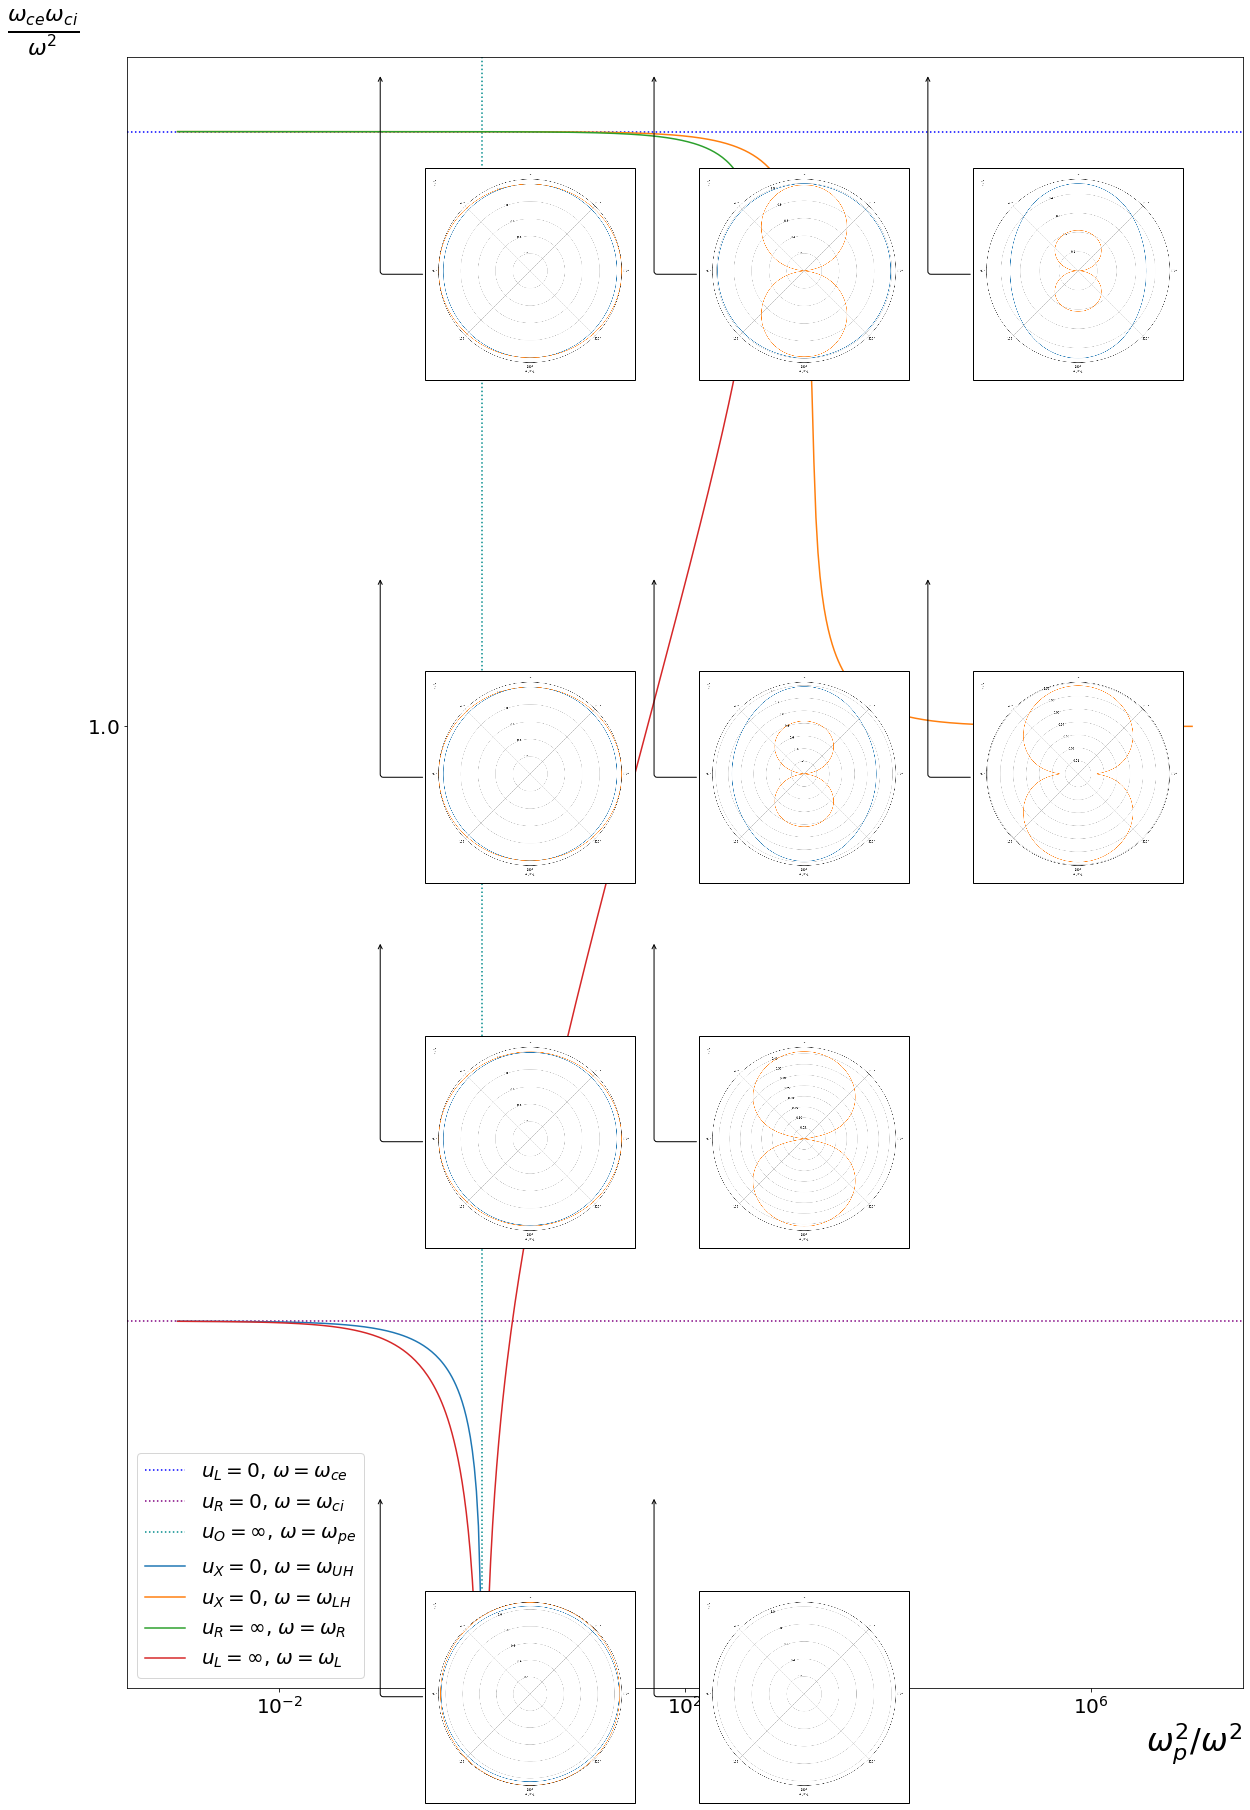

In [46]:
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

for i, (B, n_0, omega) in enumerate(plasma_B_n_0_omega):

    with get_sample_data((data_path / f"v_ph_{i}.png").absolute()) as file:
        arr_img = plt.imread(file, format='png')

    imagebox = OffsetImage(arr_img, zoom=0.28)
    imagebox.image.axes = ax_CMA
    imagebox
    x_CMA = w2N((omega_pe**2 + omega_pi**2) / omega**2)
    y_CMA = w2N(omega_ce * omega_ci / omega**2)
    xy_CMA = (x_CMA, y_CMA)
    print(xy_CMA)
    ab = AnnotationBbox(imagebox, xy_CMA,
                        xybox=(150., -200.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax_CMA.add_artist(ab)
    print(f"The {i}-th phase speed polar plot.")
fig_CMA

## References:

- For better color impression, [matplotlib official color gallery](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) can ben refered.
